In [1]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray} \large
Z_{n+1} = Z_{n}^{1.5 * Z_{n}^{\sqrt{-1} * (p_{1}^{1.5 * Z_{n}^{p_{2}}})}}
\qquad \qquad \small p = [2.76544+0.997995j, 50.1518+7.53287j]
\end{eqnarray}""")

<IPython.core.display.Latex object>

### numerical oddity - (this may actually be what an unborn Unicorn looks like).
    Sequential iteration of difference equation:
    Z = Z^(1.5 * Z^(i * p(1)^(1.5 * Z^p(2)))
    
    with parameter set:
    p = [2.76544+0.997995j, 50.1518+7.53287j]
    
    on the complex plane computes this organic graphic.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

In [3]:
def unicorn_in_utero(Z, p, Z0=None, ET=None):
    """ Z = bugga_bear(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number # p = [2.76544+0.997995j, 50.1518+7.53287j]
    Returns:
        Z:    the result (complex)
    """
    Z = Z**(1.5 * Z**(1j * p[0]**(1.5 * Z**p[1])))
    return Z

In [4]:
#                                        
par_set = {'n_rows': 800, 'n_cols': 800}
par_set['center_point'] = -0.25 + 0.0*1j
par_set['theta'] = 0.0
par_set['zoom'] = 5/8

par_set['it_max'] = 28
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

p = [2.76544+0.997995j, 50.1518+7.53287j]

list_tuple = [(unicorn_in_utero, (p))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

12.040194988250732 	 total time
converstion time =	 1.3823847770690918


coloring time =	 3.622849941253662


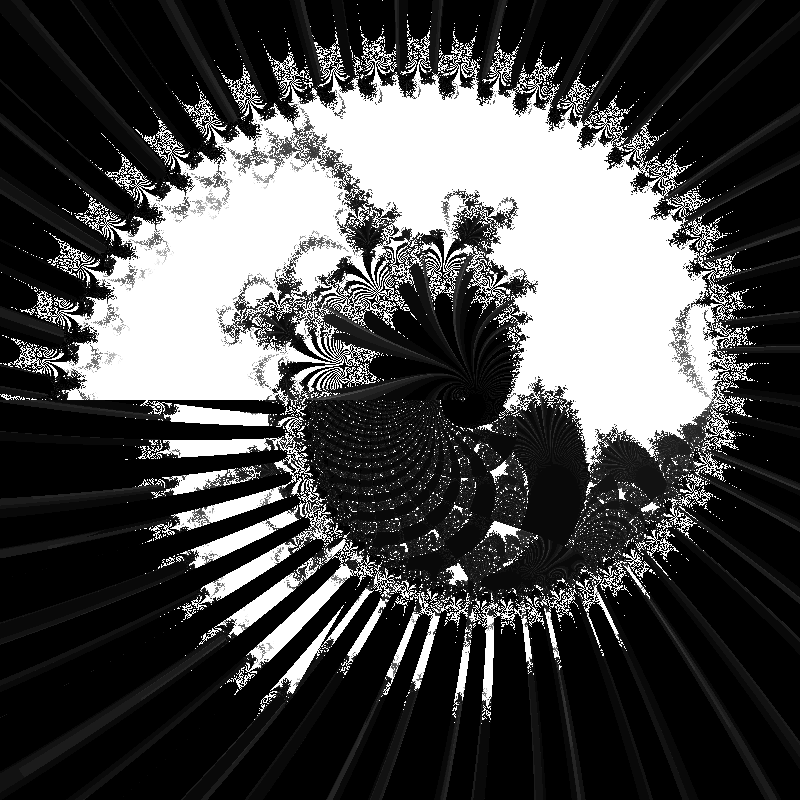

In [5]:
#                  Escape Time: darker escaped sooner
t0 = time.time()
ETd = ncp.mat_to_gray(ETn)
print('coloring time =\t',time.time() - t0)
display(ETd)

coloring time =	 3.8294410705566406


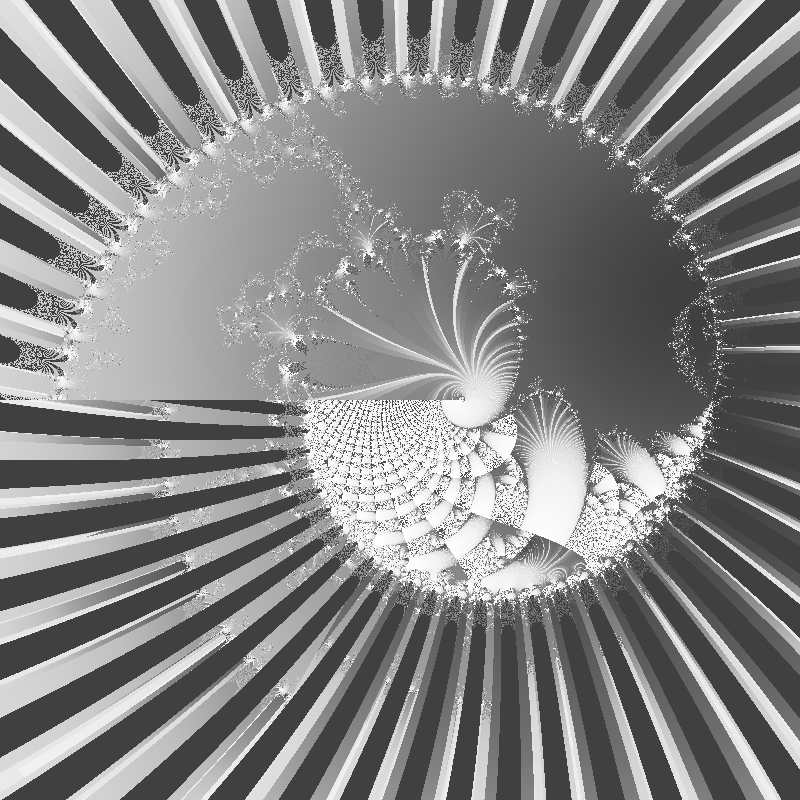

In [6]:
#                  Distance at Escape Time: lighter traveled further
t0 = time.time()
D = ncp.mat_to_gray(Zd, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(D)

coloring time =	 4.024879217147827


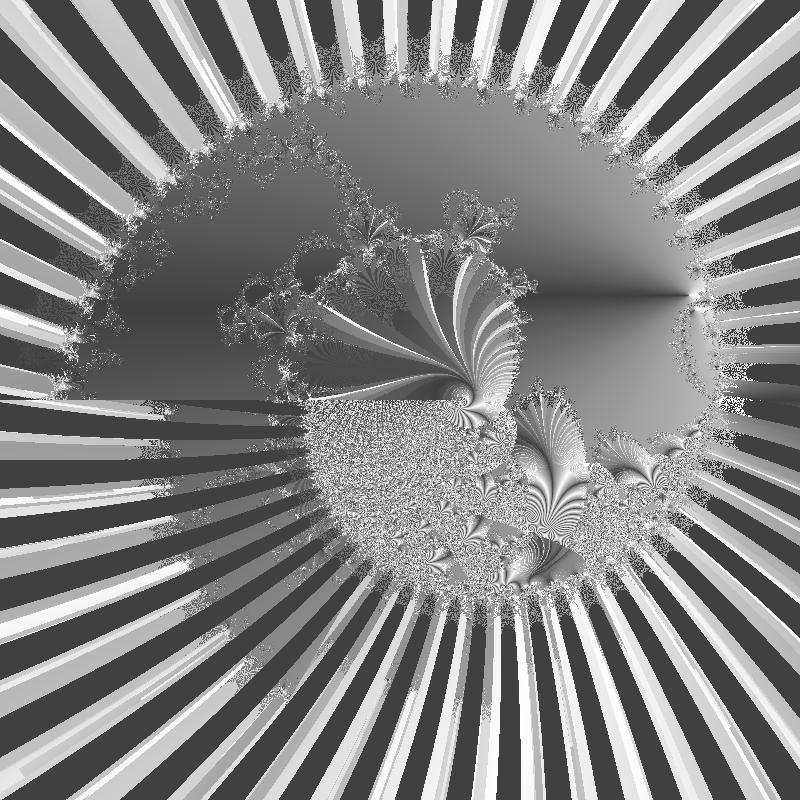

In [7]:
#                  Rotation at Escape Time: lighter rotated more
t0 = time.time()
R = ncp.mat_to_gray(Zr, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(R)

coloring time:	 8.013803958892822


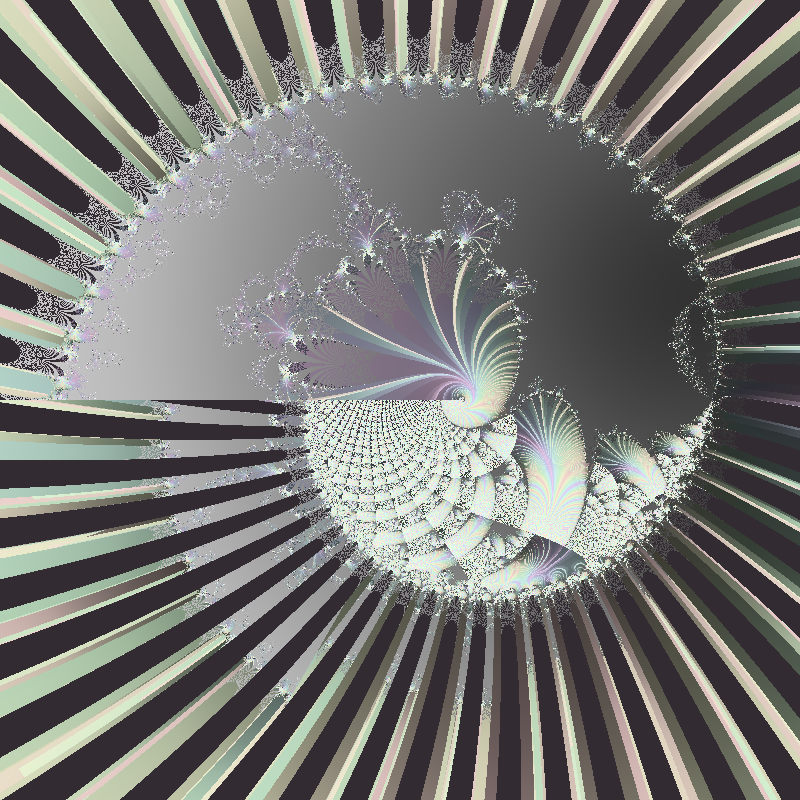

In [8]:
H = ncp.range_norm(1 - Zr, lo=0.0, hi=0.85)
S = ncp.range_norm(1 - ETn, lo=0.0, hi=0.15)
V = ncp.range_norm(Zd, lo=0.2, hi=1.0)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

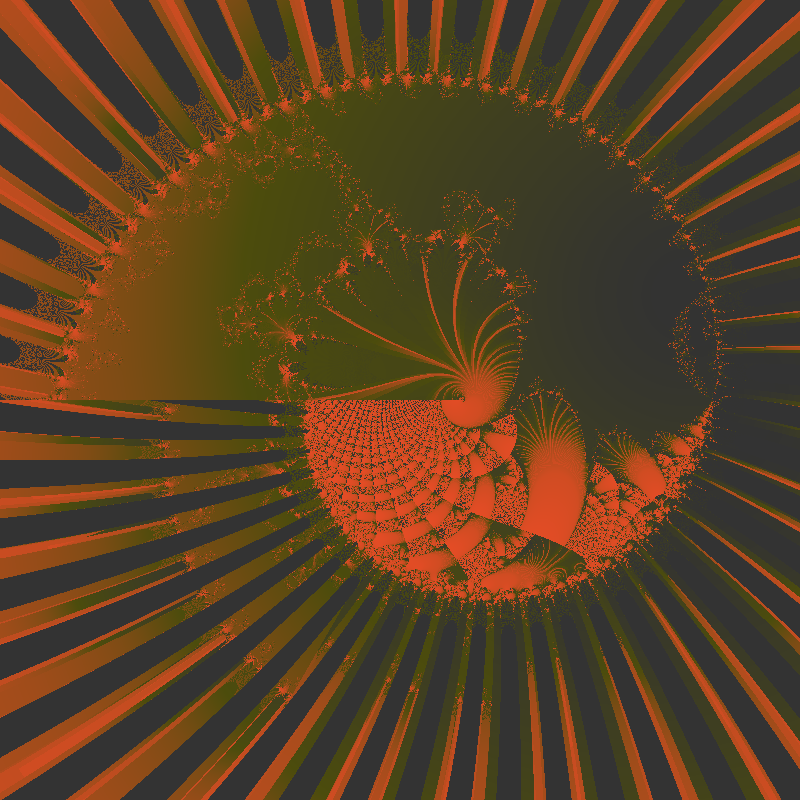

In [9]:
mp0 = np.array([[0.2,0.2,0.2],[0.3,0.3,0.05],[0.9,0.3,0.15]])
I_mapped = ncp.mat_to_mapped(Zd, mp0)
display(I_mapped)

In [10]:
#                                        
par_s = {'n_rows': 200, 'n_cols': 200}
par_s['center_point'] = -0.25 + 0.0*1j
par_s['theta'] = 0.0
par_s['zoom'] = 5/8

par_s['it_max'] = 512
par_s['max_d'] = 10 / par_s['zoom']
par_s['dir_path'] = os.getcwd()

p = [2.76544+0.997995j, 50.1518+7.53287j]

list_tuple_s = [(unicorn_in_utero, (p))]

t0 = time.time()
ET_sm, Z_sm, Z0_sm = ig.get_primitives(list_tuple_s, par_s)
print(time.time() - t0, '\t total time')

8.273756980895996 	 total time


ET =	 1


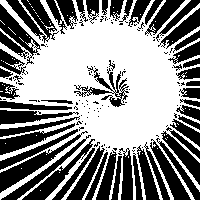

ET =	 2


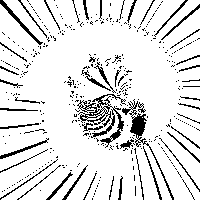

ET =	 3


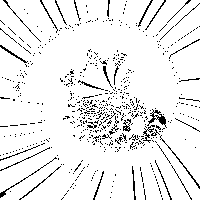

ET =	 4


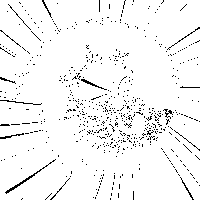

ET =	 5


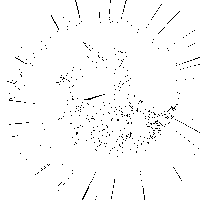

ET =	 6


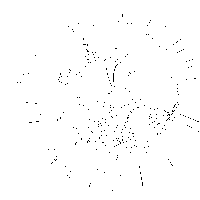

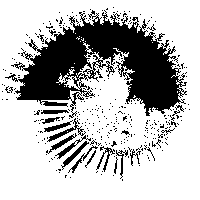

In [11]:
#                                        view smaller - individual escape time starting points
for t in range(1,7):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > 7] = 0
display(ncp.mat_to_gray(I))

In [12]:
#                                        view smaller - individual escape time frequency
for k in range(0,int(ET_sm.max())):
    print(k, (ET_sm == k).sum())
print('\nHow many never escaped:\n>',(ET_sm > k).sum())

0 0
1 18202
2 4829
3 2906
4 1730
5 788
6 358
7 180
8 134
9 69
10 65
11 65
12 60
13 39
14 34
15 30
16 16
17 16
18 29
19 28
20 23
21 15
22 18
23 10
24 12
25 4
26 11
27 12
28 5
29 5
30 4
31 4
32 3
33 5
34 6
35 2
36 1
37 4
38 5
39 0
40 3
41 2
42 1
43 3
44 1
45 1
46 1
47 0
48 1
49 0
50 1
51 0
52 2
53 1
54 0
55 1
56 0
57 2
58 2
59 0
60 3
61 1
62 0
63 3
64 1
65 0
66 1
67 1
68 0
69 0
70 1
71 1
72 1
73 0
74 1
75 0
76 0
77 1
78 1
79 1
80 0
81 0
82 2
83 0
84 0
85 0
86 0
87 1
88 0
89 0
90 0
91 0
92 0
93 1
94 0
95 0
96 0
97 0
98 1
99 0
100 1
101 0
102 0
103 0
104 0
105 0
106 0
107 2
108 0
109 0
110 0
111 1
112 0
113 1
114 0
115 1
116 1
117 0
118 0
119 2
120 0
121 2
122 0
123 0
124 0
125 1
126 0
127 0
128 1
129 0
130 0
131 1
132 0
133 0
134 0
135 1
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 1
145 1
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 1
155 0
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 1
165 0
166 0
167 0
168 0
169 0
170 1
171 0
172 0
173 2
174 1
175 1
176 0
177 0
178

In [13]:
#                           get the list of unescaped starting points and look for orbit points
Z_overs = Z0[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))

Unescaped Vector:
	V =  2.10 131.6 degrees

    10150 total unescaped points

   points near V       (plane units)
    10150 within V/ 1  (2.103)
    10150 within V/ 2  (1.052)
    10148 within V/ 3  (0.701)
     9017 within V/ 4  (0.526)
     7413 within V/ 5  (0.421)
     5657 within V/ 6  (0.351)
     4468 within V/ 7  (0.300)
     3541 within V/ 8  (0.263)
     2869 within V/ 9  (0.234)
     2362 within V/10  (0.210)
     2005 within V/11  (0.191)
